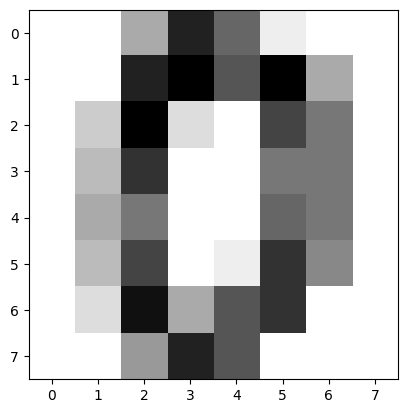

In [2]:
# 데이터 세트 읽어들이기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 로드
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [4]:
# numpy -> tensor 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [5]:
# 모델
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 입력 64차원, 출력 64차원
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)  # 10개의 숫자 분류

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

# 손실 함수와 최적화하기
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [5/100], Loss: 2.3331
Epoch [10/100], Loss: 1.8080
Epoch [15/100], Loss: 1.3839
Epoch [20/100], Loss: 1.0510
Epoch [25/100], Loss: 0.8090
Epoch [30/100], Loss: 0.6190
Epoch [35/100], Loss: 0.4845
Epoch [40/100], Loss: 0.3896
Epoch [45/100], Loss: 0.3226
Epoch [50/100], Loss: 0.2736
Epoch [55/100], Loss: 0.2374
Epoch [60/100], Loss: 0.2098
Epoch [65/100], Loss: 0.1881
Epoch [70/100], Loss: 0.1706
Epoch [75/100], Loss: 0.1558
Epoch [80/100], Loss: 0.1434
Epoch [85/100], Loss: 0.1326
Epoch [90/100], Loss: 0.1231
Epoch [95/100], Loss: 0.1146
Epoch [100/100], Loss: 0.1071


In [7]:
# 예측
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

In [8]:
# 정확도 계산
accuracy = metrics.accuracy_score(y_test.numpy(), predicted.numpy())
print('Accuracy:', accuracy)

Accuracy: 0.9555555555555556


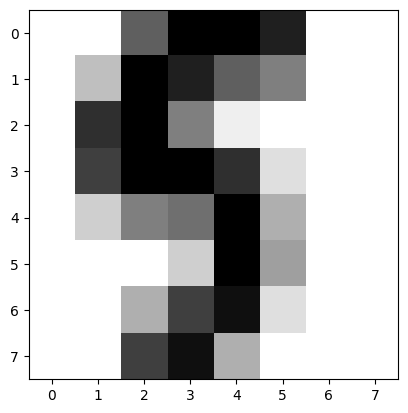

In [9]:
# 테스트 이미지 하나 보여주기
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [10]:
# 예측 결과
model.eval()
with torch.no_grad():
    sample = X_test[10].unsqueeze(0)  # 배치 차원 추가
    output = model(sample)
    _, y_pred = torch.max(output, 1)
    print('예측 결과:', y_pred.item())  # 숫자 값만 출력

예측 결과: 5


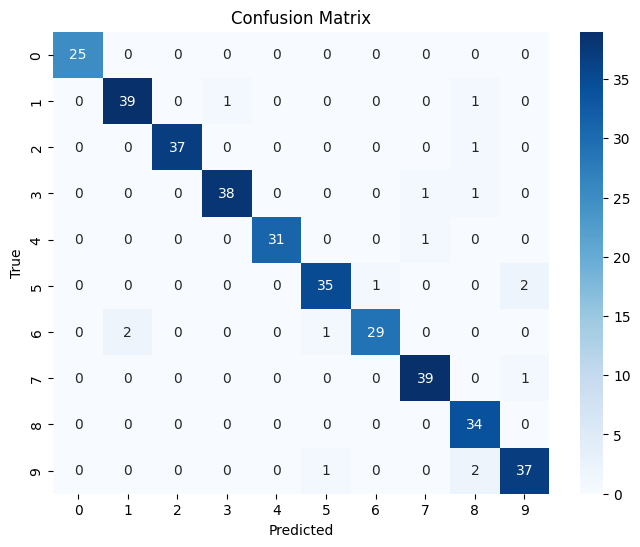

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.numpy(), predicted.numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test.numpy(), predicted.numpy(), digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        25
           1     0.9512    0.9512    0.9512        41
           2     1.0000    0.9737    0.9867        38
           3     0.9744    0.9500    0.9620        40
           4     1.0000    0.9688    0.9841        32
           5     0.9459    0.9211    0.9333        38
           6     0.9667    0.9062    0.9355        32
           7     0.9512    0.9750    0.9630        40
           8     0.8718    1.0000    0.9315        34
           9     0.9250    0.9250    0.9250        40

    accuracy                         0.9556       360
   macro avg     0.9586    0.9571    0.9572       360
weighted avg     0.9571    0.9556    0.9557       360

